# Assignment 6
## Title: Agglomerative and K-Means Clustering

Name: Pranjal Rane

NUID: 002756852

In [1]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

--2024-02-25 23:01:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1         [ <=>                ]  29.58K  --.-KB/s    in 0.08s   

2024-02-25 23:01:00 (354 KB/s) - ‘auto-mpg.data.1’ saved [30286]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

### Step 1: 
Split the dataset into training and test sets (80, 20).

In [3]:
column_names = ['Displacement', 'MPG', 'Cylinders', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
df = pd.read_csv('auto-mpg.data', names=column_names, delim_whitespace=True)
df.drop('Car Name', axis=1, inplace=True)
df = df.replace('?', np.nan)
df = df.dropna()

In [4]:
df['Cylinders'] = df['Cylinders'].astype(int)
df['Displacement'] = df['Displacement'].astype(float)
df['Horsepower'] = df['Horsepower'].astype(float)
df['Weight'] = df['Weight'].astype(float)
df['Acceleration'] = df['Acceleration'].astype(float)
df['Model Year'] = df['Model Year'].astype(int)
df['Origin'] = df['Origin'].astype(int)

In [5]:
X = df.drop('MPG', axis=1)
y = df['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2(a) 
Use all the features (1-7) to fit the linear regression model for feature 8(MPG)
using the training set.

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [7]:
def get_report(linear_regression, X_test,y_test):
  coefficients = linear_regression.coef_
  mse = mean_squared_error(y_test, linear_regression.predict(X_test))
  variance = r2_score(y_test, linear_regression.predict(X_test))
  return coefficients,mse,variance

coefficients, mse, variance = get_report(linear_regression, X_test,y_test)
print(f"Coefficients: {coefficients}")
print(f'Mean squared error :{mse:.2f}')
print(f'Variance score :{variance:.2f}')

Coefficients: [-0.00813975  0.01572144 -0.00390408  0.00015494 -0.00718232  0.00471184
  0.11244832]
Mean squared error :0.31
Variance score :0.89


### Step 3(a)
Use each feature alone - to fit a linear regression model on the training set.

### Step 3(b)
Report the coefficient, mean squared error and variance score for the model on the test set. Also report the 7 plots of the linear regression models generated on each feature. Each plot should distinctly show the training points, test points and the linear regression line.

Coefficients for Displacement: [-0.16682364]
Mean squared error for Displacement:1.24
Variance score for Displacement:0.58
-----------------
Coefficients for Cylinders: [0.01561228]
Mean squared error for Cylinders:0.33
Variance score for Cylinders:0.89
-----------------
Coefficients for Horsepower: [0.03748751]
Mean squared error for Horsepower:0.88
Variance score for Horsepower:0.70
-----------------
Coefficients for Weight: [0.00180596]
Mean squared error for Weight:0.49
Variance score for Weight:0.83
-----------------
Coefficients for Acceleration: [-0.29565674]
Mean squared error for Acceleration:2.07
Variance score for Acceleration:0.31
-----------------
Coefficients for Model Year: [-0.17374621]
Mean squared error for Model Year:2.86
Variance score for Model Year:0.04
-----------------
Coefficients for Origin: [-1.17548409]
Mean squared error for Origin:1.88
Variance score for Origin:0.37
-----------------


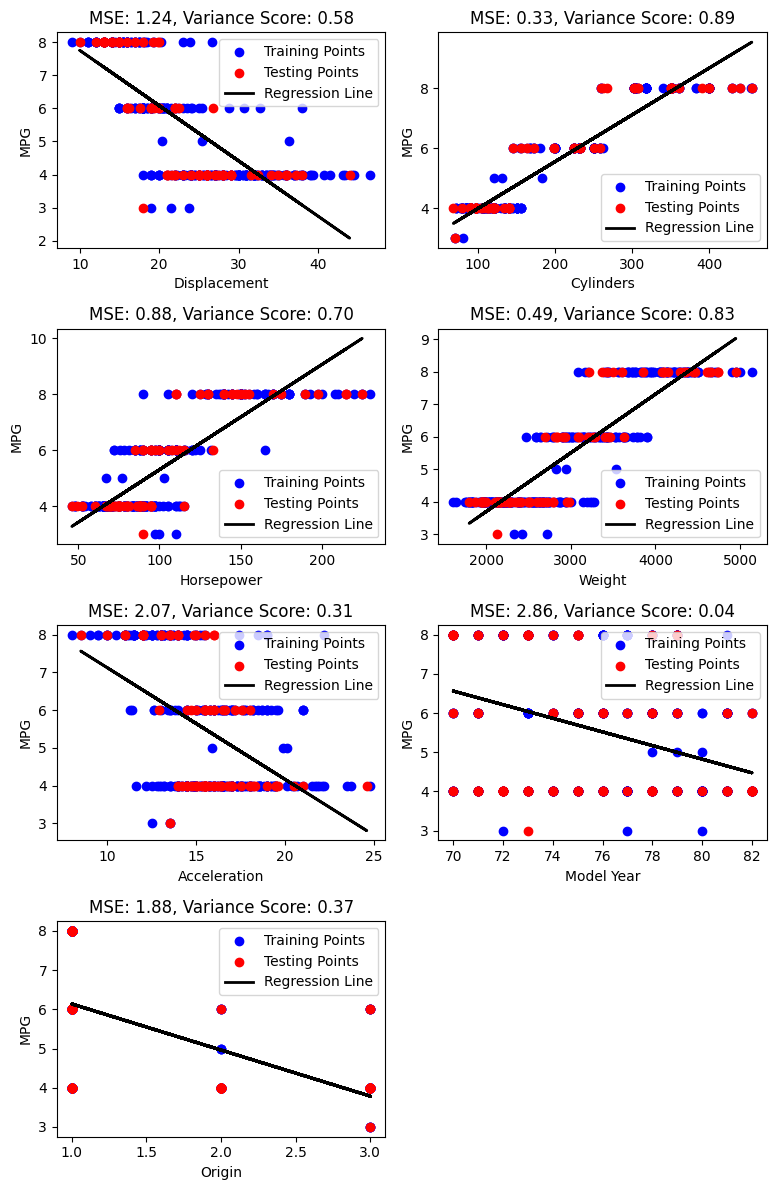

In [8]:
features = ['Displacement', 'Cylinders', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

fig, ax = plt.subplots(4, 2, figsize=(8, 12))
ax = ax.flatten()

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    lr_feature = LinearRegression()
    lr_feature.fit(X_train_feature, y_train)

    y_pred = lr_feature.predict(X_test_feature)
    coefficients,mse,variance = get_report(lr_feature, X_test_feature,y_test)


    print(f"Coefficients for {feature}: {coefficients}")
    print(f'Mean squared error for {feature}:{mse:.2f}')
    print(f'Variance score for {feature}:{variance:.2f}')
    print("-----------------")

    ax[i].scatter(X_train_feature, y_train, color='blue', label='Training Points')
    ax[i].scatter(X_test_feature, y_test, color='red', label='Testing Points')
    ax[i].plot(X_test_feature, y_pred, color='black', linewidth=2, label='Regression Line')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('MPG')
    ax[i].legend()
    ax[i].set_title(f'MSE: {mse:.2f}, Variance Score: {variance:.2f}')

for j in range(len(features), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

### Step 4(a) 
Perform 10 iterations of (Step 1, Step 2(a), and Step 3(a)).

In [9]:
num_iterations = 10
mse_avg = np.zeros(len(features) + 1)
variance_score_avg = np.zeros(len(features) + 1)

for _ in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    coefficients,mse,variance = get_report(lr, X_test,y_test)

    mse_avg[-1] += mse
    variance_score_avg[-1] += variance

    for i, feature in enumerate(features):
      X_train_feature = X_train[[feature]]
      X_test_feature = X_test[[feature]]

      lr_feature = LinearRegression()
      lr_feature.fit(X_train_feature, y_train)

      y_pred = lr_feature.predict(X_test_feature)
      coefficients,mse,variance = get_report(lr_feature, X_test_feature,y_test)

      mse_avg[i] += mse
      variance_score_avg[i] += variance

mse_avg /= num_iterations
variance_score_avg /= num_iterations

### Step 4(b)
MSE & Variance vs Features

In [10]:
mse_avg[1]

0.2751535425633613

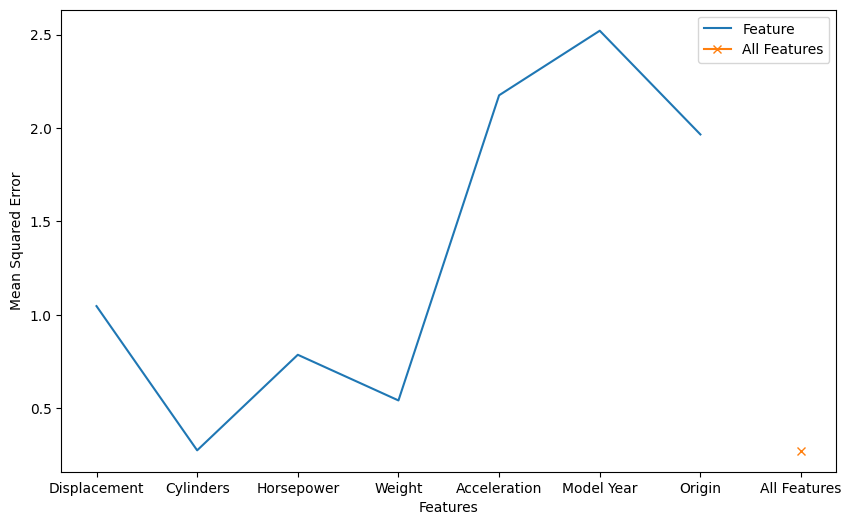

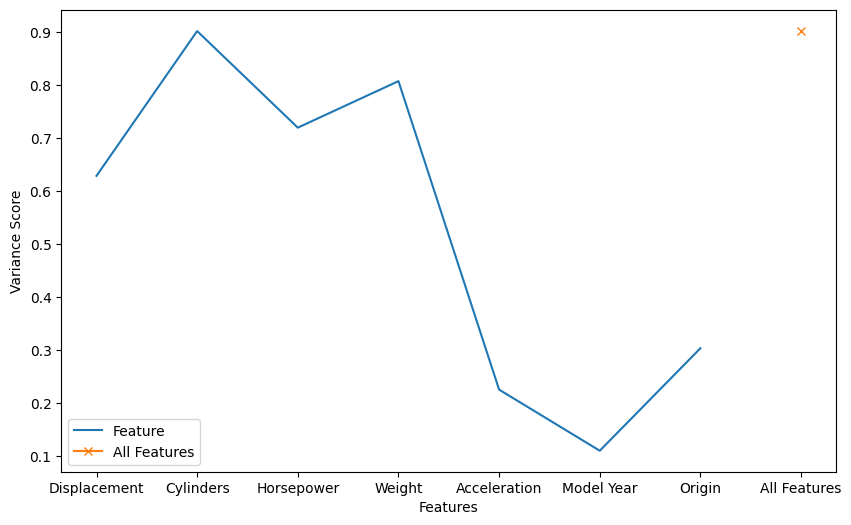

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(features)), mse_avg[:-1], label='Feature')
plt.plot(len(features), mse_avg[-1], marker='x',label='All Features')
plt.xticks(list(range(len(features))) + [len(features)], features + ['All Features'])
plt.xlabel('Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(features)), variance_score_avg[:-1], label='Feature')
plt.plot(len(features), variance_score_avg[-1], marker='x', label='All Features')
plt.xticks(list(range(len(features))) + [len(features)],  features + ['All Features'])
plt.xlabel('Features')
plt.ylabel('Variance Score')
plt.legend()
plt.show()

### Given this output, respond to the following questions

1. Based upon the linear models you generated, which feature appears to be most
predictive for the target feature? Note that you can answer this question based
upon the output provided for the linear models.

Based on these considerations, the best model appears to be the one with the Cylinders feature. It has the highest Variance Score, a positive coefficient, and a relatively low Mean Squared Error (0.33), which means it provides a good fit to the data and has a strong positive relationship with the target variable, followed by Horsepower.

2. Suppose you need to select two features for a linear regression model to predict
the target feature. Which two features would you select? Why?

Based on my analysis of the linear regression models, my top choices for predicting MPG would be the "Displacement" and "Horsepower" variables. Here's why:

  1. Displacement: The model reveals a negative coefficient for the "Displacement" feature, suggesting that as a vehicle's displacement increases, its MPG decreases. This implies a strong inverse relationship between displacement and MPG. Moreover, the model using only the "Displacement" feature exhibits relatively lower Mean Squared Error (MSE) and a high variance score compared to other features. This indicates that the "Displacement" model excels in predicting MPG.

  2. Horsepower: Much like displacement, the model solely based on "Horsepower" also demonstrates relatively lower MSE and a strong variance score when compared to other features. This underscores the significance of "Horsepower" as a valuable predictor of MPG.
By focusing on "Displacement" and "Horsepower" in our linear regression model, we effectively capture essential insights related to a vehicle's size and power, both of which play a significant role in determining its fuel efficiency.

3. Examine all the plots and numbers you have, do you have any comments on them?
Do you find any surprising trends? Do you have any idea about what might be
causing this surprising trend in the data? This is a descriptive question meant to
encourage you to interpret your results and express yourself.

1. Surprising Findings: "Origin" has a high coefficient, but using it alone yields high MSE and low variance scores for predicting MPG, implying that origin might not be as significant as thought, possibly due to technological advancements or varying standards.

2. Data Anomalies: Some outliers significantly affect the regression model, altering coefficient values. Further investigation is needed to confirm their validity or consider data cleaning and outlier treatment.